In [ ]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [8]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

In [9]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I like "}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +"Coffee."}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +"Coke."}

def node_4(state):
    print("---Node 4---")
    return {"graph_state": state['graph_state'] +"Whiskey!"}

def node_5(state):
    print("---Node 5---")
    return {"graph_state": state['graph_state'] +"Rum!"}



In [10]:
import random
from typing import Literal

def choose_drink(state) -> Literal["node_2", "node_3", "node_4", "node_5"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    #choose between 4 nodes
    #equal 25% chance for each.
    nodes = ["node_2", "node_3", "node_4", "node_5"]
    return random.choice(nodes)

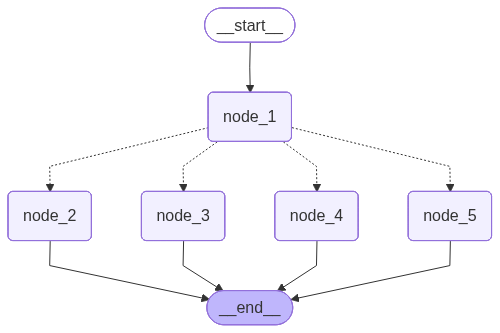

In [11]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", choose_drink)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)
builder.add_edge("node_5", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({"graph_state" : "Hellooo anshul this side."})

---Node 1---
---Node 3---


{'graph_state': 'Hellooo anshul this side. I like Coke.'}